In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Import data
raw_eqk = pd.read_csv('../../data/earthquake_data.csv')

In [3]:
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


#### Data Selection

In [ ]:
#Check which are the unique values for the type of earthquakes

raw_eqk.type.unique()

### Data for world map

In [ ]:
fp = os.path.join('../','data', 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries.shp')
worldmap = gpd.read_file(fp)

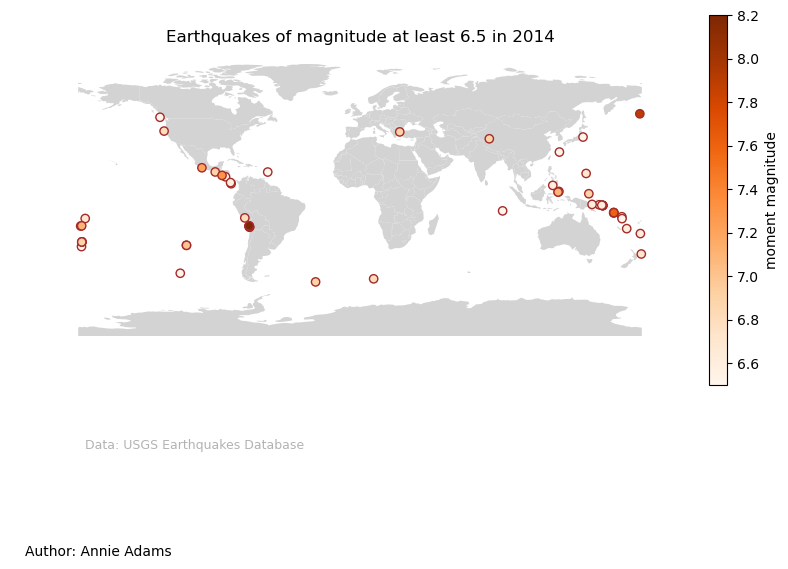

In [14]:
# Read in data
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

fp = os.path.join('../','data', 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries.shp')
worldmap = gpd.read_file(fp)

# Select only earthquakes of magnitude geq 6.5
eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag >= 6.5)]

# Convert earthquake data into geo-df
eqk = gpd.GeoDataFrame(eqk, 
                       geometry = gpd.points_from_xy(eqk.longitude, eqk.latitude),
                       crs='EPSG:4326'
                       )

# Create plot
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('off')

worldmap.plot(ax=ax,
           color='lightgrey')
eqk.plot(ax=ax,
        column='mag',
        cmap='Oranges',
        edgecolor='brown',
        legend=True,
        legend_kwds={'shrink':.6,
                    'label':'moment magnitude'})

ax.set_title('Earthquakes of magnitude at least 6.5 in 2014')

ax.annotate('Data: USGS Earthquakes Database',
             xy=(0.085,0.15),
             xycoords='figure fraction',
             fontsize=9,
             color='0.7')
plt.figtext(0.1,.05, "Author: Annie Adams") # 10% up, 5% across from botom

plt.show()